In [1]:
# Garbage collection and empty cache
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

In [2]:
import sys
from pathlib import Path

# Add the project root directory to the Python path
project_root = Path.cwd().parent  # Adjust as needed to point to the parent directory of `scripts`
sys.path.insert(0, str(project_root))

In [3]:
project_root

PosixPath('/home/david/Documents/data_science/llm/david/LLMs-from-scratch')

In [4]:
import argparse
import os
from pathlib import Path
import time
import tiktoken
import torch
from previous_chapters import (
    create_dataloader_v1,
    GPTModel,
    generate_and_print_sample,
    calc_loss_batch,
    evaluate_model,
    plot_losses
)


In [5]:

def read_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()
    return text_data


def create_dataloaders(text_data, train_ratio, batch_size, max_length, stride, num_workers=0):
    split_idx = int(train_ratio * len(text_data))
    train_loader = create_dataloader_v1(
        text_data[:split_idx],
        batch_size=batch_size,
        max_length=max_length,
        stride=stride,
        drop_last=True,
        shuffle=True,
        num_workers=num_workers
    )
    val_loader = create_dataloader_v1(
        text_data[split_idx:],
        batch_size=batch_size,
        max_length=max_length,
        stride=stride,
        drop_last=False,
        shuffle=False,
        num_workers=num_workers
    )
    return train_loader, val_loader


def convert_time(seconds):
    hours, rem = divmod(seconds, 3600)
    minutes, seconds = divmod(rem, 60)
    return int(hours), int(minutes), int(seconds)


def print_eta(start_time, book_start_time, index, total_files):
    book_end_time = time.time()  # End time of processing this book
    elapsed_time = book_end_time - book_start_time
    total_elapsed_time = book_end_time - start_time
    books_remaining = total_files - index
    average_time_per_book = total_elapsed_time / index
    eta = average_time_per_book * books_remaining

    book_h, book_m, book_s = convert_time(elapsed_time)
    total_h, total_m, total_s = convert_time(total_elapsed_time)
    eta_h, eta_m, eta_s = convert_time(eta)

    print(f"Book processed {book_h}h {book_m}m {book_s}s"
          f"\nTotal time elapsed {total_h}h {total_m}m {total_s}s"
          f"\nETA for remaining books: {eta_h}h {eta_m}m {eta_s}s")


In [6]:
!pwd

/home/david/Documents/data_science/llm/david/LLMs-from-scratch/gutenberg


In [7]:
# Fixed variables with default values
data_dir = "/home/david/Documents/data_science/datasets/gutenberg/gutenberg_preprocessed"  # Directory containing the training data
output_dir = "model_checkpoints"  # Directory where the model checkpoints will be saved
n_epochs = 1  # Number of epochs to train the model
print_sample_iter = 1000  # Iterations between printing sample outputs
eval_freq = 100  # Frequency of evaluations during training
save_ckpt_freq = 100_000  # Frequency of saving model checkpoints during training
lr = 5e-4  # Learning rate for the optimizer
batch_size = 4  # Batch size for training
debug = False  # Uses a very small model for debugging purposes


We will initialize this small one (see the 03_pretraining.py for the big GPT model)

In [8]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 10,    # Context length
    "emb_dim": 12,           # Embedding dimension
    "n_heads": 2,            # Number of attention heads
    "n_layers": 2,           # Number of layers
    "drop_rate": 0.0,        # Dropout rate, deactivated via 0.0 as dropout in LLMs is not recommended anymore
    "qkv_bias": False        # Query-key-value bias
}

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(123)

In [10]:
model = GPTModel(GPT_CONFIG_124M)
model.to(device);

In [11]:
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=0.1)
tokenizer = tiktoken.get_encoding("gpt2")

In [12]:
all_files = [os.path.join(path, name) for path, subdirs, files
                 in os.walk(data_dir) for name in files if name.endswith((".txt"))]
total_files = len(all_files)
print("Total files:", total_files)

Total files: 1


In [13]:
output_dir = Path(output_dir)
output_dir.mkdir(parents=True, exist_ok=True)

### Train Simple

In [14]:
# train_losses, val_losses, tokens_seen = train_model_simple(
#     model, optimizer, device,
#     batch_size=args.batch_size,
#     n_epochs=args.n_epochs,
#     eval_freq=args.eval_freq,
#     eval_iter=1,
#     print_sample_iter=args.print_sample_iter,
#     output_dir=output_dir,
#     save_ckpt_freq=args.save_ckpt_freq,
#     start_context="Every effort moves you",
#     tokenizer=tokenizer
# )

In [15]:
train_losses, val_losses, track_tokens_seen = [], [], []
tokens_seen = 0
global_step = -1
start_time = time.time()

In [16]:
epoch = 0

In [17]:
 # Iterate over the books in the training corpus
for index, file_path in enumerate(all_files, 1):
    break

In [18]:
file_path

'/home/david/Documents/data_science/datasets/gutenberg/gutenberg_preprocessed/combined_1.txt'

In [19]:
index

1

In [20]:
book_start_time = time.time()
text_data = read_text_file(file_path) + " <|endoftext|> "
print(f"Tokenizing file {index} of {total_files}: {file_path}")

Tokenizing file 1 of 1: /home/david/Documents/data_science/datasets/gutenberg/gutenberg_preprocessed/combined_1.txt


In [21]:
batch_size=1024
train_ratio=0.90

In [22]:
# Initialize new data loaders for each book
train_loader, val_loader = create_dataloaders(
    text_data,
    train_ratio=train_ratio,
    batch_size=batch_size,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    num_workers=0
)

In [23]:
for input_batch, target_batch in train_loader:
    break

In [24]:
input_batch

tensor([[  198,  1870,   484,  ...,   649, 45173,    11],
        [ 3100,  2004,  1194,  ...,   303,   329,   326],
        [37497,   262, 41660,  ...,   584, 20668, 32789],
        ...,
        [  262,  2607,   286,  ...,   286, 12139,   262],
        [   11,   290,  2627,  ...,   340,    13,   198],
        [   22,    25,  1157,  ...,   656,   257, 15299]])

In [25]:
target_batch

tensor([[ 1870,   484,  5421,  ..., 45173,    11,   290],
        [ 2004,  1194,   880,  ...,   329,   326,   635],
        [  262, 41660, 20668,  ..., 20668, 32789,   198],
        ...,
        [ 2607,   286, 15987,  ..., 12139,   262, 11503],
        [  290,  2627,   198,  ...,    13,   198,   198],
        [   25,  1157, 20908,  ...,   257, 15299,   286]])

In [26]:
input_batch.shape

torch.Size([1024, 10])

In [27]:
target_batch.shape

torch.Size([1024, 10])

In [28]:
loss = calc_loss_batch(input_batch, target_batch, model, device)

In [29]:
loss

tensor(10.9594, device='cuda:0', grad_fn=<NllLossBackward0>)

In [30]:
loss.backward()

In [31]:
optimizer.step()

In [32]:
tokens_seen += input_batch.numel()

In [33]:
tokens_seen

10240

In [34]:
global_step += 1

In [35]:
eval_freq

100

In [36]:
# Evaluation step
eval_iter=1
train_loss, val_loss = evaluate_model(model, train_loader, val_loader, device, eval_iter)

In [37]:
print(f"Ep {epoch+1} (Step {global_step}): "
                              f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

Ep 1 (Step 0): Train loss 10.933, Val loss 10.929


In [38]:
start_context = "Every effort moves you"
generate_and_print_sample(
    model, tokenizer, device, start_context
)

Every effort moves you executedrolley Duncan Shrine Sets acquitted Census interorian656 Wastelandstretched"></ Correctional directing smellingination OrbAngel LAR envelope192Weight LAR demonstrations Recorded Wasteland Astron.).oise striving templateface Somination OrbAngel LAR envelope192Weight LAR envelope192Weightsuggest cabal restoreossiblysuggest


### Plot losses

In [50]:
train_losses = [1, 0.9, 0.7, 0.6]
val_losses = [0.8, 0.7, 0.6, 0.5]
tokens_seen = [0, 1000, 2000, 3000]
epochs_tensor = torch.linspace(0, n_epochs, len(train_losses))

In [51]:
train_losses

[1, 0.9, 0.7, 0.6]

In [52]:
n_epochs

1

In [53]:
epochs_tensor

tensor([0.0000, 0.3333, 0.6667, 1.0000])

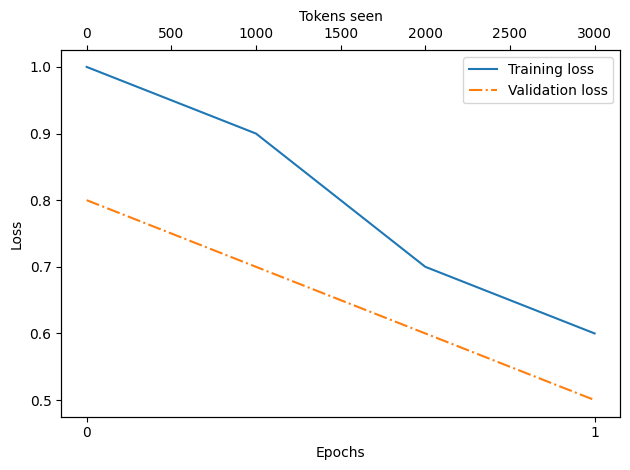

In [54]:
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses, output_dir)